In [1]:
# FIX: Downgrade PyTorch to a YOLOv8-compatible version

!pip uninstall -y torch torchvision torchaudio
!pip install torch==2.5.1 torchvision==0.20.1 torchaudio==2.5.1


Found existing installation: torch 2.9.0+cu126
Uninstalling torch-2.9.0+cu126:
  Successfully uninstalled torch-2.9.0+cu126
Found existing installation: torchvision 0.24.0+cu126
Uninstalling torchvision-0.24.0+cu126:
  Successfully uninstalled torchvision-0.24.0+cu126
Found existing installation: torchaudio 2.9.0+cu126
Uninstalling torchaudio-2.9.0+cu126:
  Successfully uninstalled torchaudio-2.9.0+cu126
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 906.4/906.4 MB 1.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 124.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 107.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 110.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 82.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 60.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [2]:
# Block 1: Mount Google Drive and create project structure

from google.colab import drive
import os

drive.mount('/content/drive')

PROJECT_ROOT = "/content/drive/MyDrive/ChildSafetyProject1"
RAW_IMAGES_DIR = os.path.join(PROJECT_ROOT, "raw_images")
YOLO_DATASET_DIR = os.path.join(PROJECT_ROOT, "yolo_dataset")

os.makedirs(RAW_IMAGES_DIR, exist_ok=True)
os.makedirs(YOLO_DATASET_DIR, exist_ok=True)

print("Project folders ready")


Mounted at /content/drive
Project folders ready


In [3]:
# Block 3: Generate synthetic images with Stable Diffusion

import torch
from diffusers import StableDiffusionPipeline
import os

pipe = StableDiffusionPipeline.from_pretrained(
    "runwayml/stable-diffusion-v1-5",
    torch_dtype=torch.float16
)
pipe = pipe.to("cuda")

danger_prompts = {
    "scissors": "sharp metal scissors on a child's bedroom floor, toys around, realistic photo",
    "battery": "small button battery on a nursery carpet, close-up, realistic",
    "detergent": "colorful detergent bottle on a low shelf in a playroom, realistic",
    "wires": "damaged electrical wire with exposed copper on bedroom floor, realistic"
}

IMAGES_PER_CLASS = 10

for label, prompt in danger_prompts.items():
    for i in range(IMAGES_PER_CLASS):
        image = pipe(prompt, guidance_scale=7.5, num_inference_steps=30).images[0]
        image.save(os.path.join(RAW_IMAGES_DIR, f"{label}_{i}.jpg"))

print("Image generation completed")

Flax classes are deprecated and will be removed in Diffusers v1.0.0. We recommend migrating to PyTorch classes or pinning your version of Diffusers.
Flax classes are deprecated and will be removed in Diffusers v1.0.0. We recommend migrating to PyTorch classes or pinning your version of Diffusers.
/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

scheduler_config.json:   0%|          | 0.00/308 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/617 [00:00<?, ?B/s]

safety_checker/model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

text_encoder/model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

config.json:   0%|          | 0.00/547 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

unet/diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

vae/diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

`torch_dtype` is deprecated! Use `dtype` instead!


  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

Image generation completed


In [6]:
import os
!pip install autodistill-grounding-dino==0.1.3 roboflow --quiet

from autodistill_grounding_dino import GroundingDINO
from autodistill.detection import CaptionOntology

ontology = CaptionOntology({
    "scissors": "Sharp Object",
    "battery": "Choking Hazard",
    "detergent bottle": "Chemical Danger",
    "exposed electrical wire": "Electrical Hazard"
})

model = GroundingDINO(ontology=ontology)

dataset = model.label(
    input_folder=RAW_IMAGES_DIR,
    output_folder=YOLO_DATASET_DIR,
    extension=".jpg"
)

print("Automatic labeling completed")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 14.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 62.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 71.1 MB/s eta 0:00:00


Importing from timm.models.layers is deprecated, please import via timm.layers


trying to load grounding dino directly
downloading dino model weights


torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3595.)


final text_encoder_type: bert-base-uncased


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
Labeling /content/drive/MyDrive/ChildSafetyProject1/raw_images/scissors_0.jpg:   0%|          | 0/40 [00:00<?, ?it/s]The `device` argument is de

Labeled dataset created - ready for distillation.
Automatic labeling completed


In [7]:
# Block 5: Train/Validation split

import os
import shutil
import random

random.seed(42)

images_dir = os.path.join(YOLO_DATASET_DIR, "images")
labels_dir = os.path.join(YOLO_DATASET_DIR, "labels")

for split in ["train", "val"]:
    os.makedirs(os.path.join(images_dir, split), exist_ok=True)
    os.makedirs(os.path.join(labels_dir, split), exist_ok=True)

all_images = [f for f in os.listdir(images_dir) if f.endswith(".jpg")]
random.shuffle(all_images)

split_idx = int(0.8 * len(all_images))
train_imgs = all_images[:split_idx]
val_imgs = all_images[split_idx:]

def move_files(img_list, split):
    for img in img_list:
        shutil.move(os.path.join(images_dir, img), os.path.join(images_dir, split, img))
        lbl = img.replace(".jpg", ".txt")
        shutil.move(os.path.join(labels_dir, lbl), os.path.join(labels_dir, split, lbl))

move_files(train_imgs, "train")
move_files(val_imgs, "val")

print("Train/Val split done")

Train/Val split done


In [8]:
# Block 6: Create data.yaml for YOLOv8

import yaml

data_yaml = {
    "path": YOLO_DATASET_DIR,
    "train": "train/images", # Corrected path to match autodistill output
    "val": "valid/images",   # Corrected path to match autodistill output (autodistill uses 'valid')
    "names": [
        "Sharp Object",
        "Choking Hazard",
        "Chemical Danger",
        "Electrical Hazard"
    ]
}

yaml_path = os.path.join(YOLO_DATASET_DIR, "data.yaml")

with open(yaml_path, "w") as f:
    yaml.dump(data_yaml, f)

print("data.yaml created")

data.yaml created


In [12]:
# Block 7: Train YOLOv8 (WORKING VERSION FOR COLAB)

!pip install ultralytics --quiet

import torch
from ultralytics import YOLO
from ultralytics.nn.tasks import DetectionModel
from ultralytics.nn.modules import Conv

# Add necessary classes to PyTorch's safe globals for unpickling
torch.serialization.add_safe_globals(
    [torch.nn.modules.container.ModuleList, DetectionModel, torch.nn.modules.container.Sequential, Conv]
)

# Load pretrained YOLOv8 nano model
model = YOLO("yolov8n.pt")

# Train
model.train(
    data=yaml_path,
    epochs=50,
    imgsz=640,
    batch=8,
    device=0,  # GPU
    project="child_safety_project_runs", # Changed to a simple valid name for wandb integration
    name="yolov8_child_safety"
)

print("Training finished successfully")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 31.7 MB/s eta 0:00:00
Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Ultralytics 8.3.240 🚀 Python-3.12.12 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/drive/MyDrive/ChildSafetyProject1/yolo_dataset/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fra

Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at ../aten/src/ATen/Context.cpp:208.)
Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:1

AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.5±0.3 ms, read: 27.1±11.3 MB/s, size: 48.2 KB)
train: Scanning /content/drive/MyDrive/ChildSafetyProject1/yolo_dataset/train/labels... 32 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 32/32 135.5it/s 0.2s
train: New cache created: /content/drive/MyDrive/ChildSafetyProject1/yolo_dataset/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 1.5±1.1 ms, read: 12.4±6.7 MB/s, size: 54.8 KB)
val: Scanning /content/drive/MyDrive/ChildSafetyProject1/yolo_dataset/valid/labels... 8 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 8/8 70.3it/s 0.1s
val: New cache created: /content/drive/MyDrive/ChildSafetyProject1/yolo_dataset/valid/labels.cache
Plotting labels to /content/child_safety_project_runs/yolov8_child_safety/labels

Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at ../aten/src/ATen/Context.cpp:208.)


       1/50       4.3G     0.8085      3.248      1.215        120        640: 100% ━━━━━━━━━━━━ 4/4 1.4it/s 2.9s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 1.1s/it 1.1s
                   all          8         37      0.012      0.785      0.202      0.124

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
       2/50      4.32G     0.7611      3.249       1.17        144        640: 0% ──────────── 0/4  0.2s

Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at ../aten/src/ATen/Context.cpp:208.)


       2/50      4.32G     0.7255      3.132      1.177        113        640: 100% ━━━━━━━━━━━━ 4/4 6.3it/s 0.6s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 12.3it/s 0.1s
                   all          8         37     0.0112      0.743      0.244      0.153

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
       3/50      4.32G     0.8117      3.113      1.148        120        640: 0% ──────────── 0/4  0.1s

Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at ../aten/src/ATen/Context.cpp:208.)


       3/50      4.33G     0.7271      3.001      1.148        161        640: 100% ━━━━━━━━━━━━ 4/4 6.3it/s 0.6s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 11.7it/s 0.1s
                   all          8         37     0.0119      0.743      0.317      0.207

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
       4/50      4.33G     0.6084       2.94      1.086        144        640: 0% ──────────── 0/4  0.1s

Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at ../aten/src/ATen/Context.cpp:208.)


       4/50      4.33G     0.6003      2.863      1.106        109        640: 100% ━━━━━━━━━━━━ 4/4 7.1it/s 0.6s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 12.2it/s 0.1s
                   all          8         37     0.0133      0.743       0.38      0.279

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
       5/50      4.33G     0.6376      2.715      1.134        150        640: 0% ──────────── 0/4  0.1s

Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at ../aten/src/ATen/Context.cpp:208.)


       5/50      4.33G     0.6482      2.666       1.14        141        640: 100% ━━━━━━━━━━━━ 4/4 6.6it/s 0.6s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 10.3it/s 0.1s
                   all          8         37     0.0141      0.764      0.405      0.312

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
       6/50      4.33G     0.5802      2.499      1.115        118        640: 0% ──────────── 0/4  0.1s

Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at ../aten/src/ATen/Context.cpp:208.)


       6/50      4.33G     0.5835      2.387      1.126        108        640: 100% ━━━━━━━━━━━━ 4/4 7.1it/s 0.6s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 8.7it/s 0.1s
                   all          8         37     0.0137      0.764        0.4      0.314

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
       7/50      4.33G     0.7765      2.556      1.183        123        640: 0% ──────────── 0/4  0.1s

Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at ../aten/src/ATen/Context.cpp:208.)


       7/50      4.33G     0.6374      2.387      1.138        166        640: 100% ━━━━━━━━━━━━ 4/4 7.0it/s 0.6s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 11.1it/s 0.1s
                   all          8         37     0.0139      0.792      0.424      0.338

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
       8/50      4.33G     0.5846      2.443      1.125        124        640: 0% ──────────── 0/4  0.1s

Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at ../aten/src/ATen/Context.cpp:208.)


       8/50      4.33G     0.5793      2.282      1.098        110        640: 100% ━━━━━━━━━━━━ 4/4 7.6it/s 0.5s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 10.3it/s 0.1s
                   all          8         37     0.0155      0.875      0.459      0.351

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
       9/50      4.33G     0.5917       1.99      1.065        134        640: 0% ──────────── 0/4  0.1s

Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at ../aten/src/ATen/Context.cpp:208.)


       9/50      4.33G     0.6146      2.115      1.142        110        640: 100% ━━━━━━━━━━━━ 4/4 7.6it/s 0.5s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 11.5it/s 0.1s
                   all          8         37     0.0149      0.875       0.49      0.388

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
      10/50      4.33G     0.5252      2.128      1.049        143        640: 0% ──────────── 0/4  0.2s

Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at ../aten/src/ATen/Context.cpp:208.)


      10/50      4.33G     0.5778      2.028      1.124        131        640: 100% ━━━━━━━━━━━━ 4/4 4.4it/s 0.9s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 5.6it/s 0.2s
                   all          8         37      0.458      0.453      0.503      0.344

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
      11/50      4.33G     0.5089      1.941      1.074         94        640: 0% ──────────── 0/4  0.2s

Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at ../aten/src/ATen/Context.cpp:208.)


      11/50      4.33G     0.5793      1.955      1.091        146        640: 100% ━━━━━━━━━━━━ 4/4 4.8it/s 0.8s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 9.0it/s 0.1s
                   all          8         37      0.818      0.261      0.506      0.332

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
      12/50      4.33G     0.5791      2.074      1.097        178        640: 0% ──────────── 0/4  0.1s

Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at ../aten/src/ATen/Context.cpp:208.)


      12/50      4.33G     0.6005      1.922      1.108        132        640: 100% ━━━━━━━━━━━━ 4/4 4.5it/s 0.9s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 5.9it/s 0.2s
                   all          8         37      0.878      0.228      0.581      0.368

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
      13/50      4.33G      0.509       1.78      1.069        150        640: 0% ──────────── 0/4  0.1s

Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at ../aten/src/ATen/Context.cpp:208.)


      13/50      4.33G     0.5577      1.836       1.11        127        640: 100% ━━━━━━━━━━━━ 4/4 4.4it/s 0.9s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 7.2it/s 0.1s
                   all          8         37      0.987      0.075      0.688      0.489

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
      14/50      4.33G      0.637      2.122      1.114        128        640: 0% ──────────── 0/4  0.1s

Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at ../aten/src/ATen/Context.cpp:208.)


      14/50      4.33G     0.5809      1.813      1.112        112        640: 100% ━━━━━━━━━━━━ 4/4 7.7it/s 0.5s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 10.3it/s 0.1s
                   all          8         37      0.983      0.187      0.697      0.481

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
      15/50      4.33G     0.6006      1.846      1.131        122        640: 25% ━━━───────── 1/4 1.3it/s 0.2s<2.3s

Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at ../aten/src/ATen/Context.cpp:208.)


      15/50      4.33G     0.5817      1.784      1.099        125        640: 100% ━━━━━━━━━━━━ 4/4 7.5it/s 0.5s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 11.3it/s 0.1s
                   all          8         37      0.871     0.0825      0.673      0.466

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
      16/50      4.33G     0.5498      1.703      1.045        133        640: 0% ──────────── 0/4  0.1s

Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at ../aten/src/ATen/Context.cpp:208.)


      16/50      4.33G     0.5872      1.756      1.108        137        640: 100% ━━━━━━━━━━━━ 4/4 7.3it/s 0.5s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 10.8it/s 0.1s
                   all          8         37      0.871     0.0825      0.673      0.466

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
      17/50      4.33G     0.6534      1.744      1.073        141        640: 0% ──────────── 0/4  0.1s

Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at ../aten/src/ATen/Context.cpp:208.)


      17/50      4.33G     0.6043       1.69       1.09        118        640: 100% ━━━━━━━━━━━━ 4/4 7.5it/s 0.5s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 9.3it/s 0.1s
                   all          8         37      0.902      0.127      0.677      0.494

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
      18/50      4.33G     0.5863      1.583      1.094        149        640: 0% ──────────── 0/4  0.1s

Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at ../aten/src/ATen/Context.cpp:208.)


      18/50      4.33G     0.5911        1.7      1.109        134        640: 100% ━━━━━━━━━━━━ 4/4 7.0it/s 0.6s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 11.0it/s 0.1s
                   all          8         37      0.789      0.234      0.687      0.517

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
      19/50      4.33G     0.5955      1.634      1.131        144        640: 25% ━━━───────── 1/4 2.6it/s 0.2s<1.1s

Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at ../aten/src/ATen/Context.cpp:208.)


      19/50      4.33G      0.603      1.685      1.131         84        640: 100% ━━━━━━━━━━━━ 4/4 8.0it/s 0.5s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 8.8it/s 0.1s
                   all          8         37      0.789      0.234      0.687      0.517

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
      20/50      4.33G     0.5186      1.503      1.048        122        640: 0% ──────────── 0/4  0.1s

Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at ../aten/src/ATen/Context.cpp:208.)


      20/50      4.33G     0.5486      1.609      1.077        133        640: 100% ━━━━━━━━━━━━ 4/4 7.5it/s 0.5s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 11.5it/s 0.1s
                   all          8         37      0.605      0.693      0.723       0.53

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
      21/50      4.33G     0.6054      1.707      1.133        159        640: 0% ──────────── 0/4  0.1s

Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at ../aten/src/ATen/Context.cpp:208.)


      21/50      4.33G     0.5995      1.635      1.129        126        640: 100% ━━━━━━━━━━━━ 4/4 6.4it/s 0.6s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 11.6it/s 0.1s
                   all          8         37      0.574      0.797       0.77      0.613

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
      22/50      4.33G     0.6142      1.819      1.153        129        640: 25% ━━━───────── 1/4 2.3it/s 0.2s<1.3s

Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at ../aten/src/ATen/Context.cpp:208.)


      22/50      4.33G     0.5771      1.735      1.147        117        640: 100% ━━━━━━━━━━━━ 4/4 7.6it/s 0.5s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 11.0it/s 0.1s
                   all          8         37      0.574      0.797       0.77      0.613

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
      23/50      4.33G     0.7326      1.727      1.206        154        640: 25% ━━━───────── 1/4 2.2it/s 0.3s<1.4s

Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at ../aten/src/ATen/Context.cpp:208.)


      23/50      4.33G     0.6565      1.696      1.151        178        640: 100% ━━━━━━━━━━━━ 4/4 7.4it/s 0.5s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 9.9it/s 0.1s
                   all          8         37      0.524      0.894      0.729      0.587

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
      24/50      4.33G     0.5728      1.563      1.134        139        640: 0% ──────────── 0/4  0.2s

Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at ../aten/src/ATen/Context.cpp:208.)


      24/50      4.33G      0.545       1.55      1.093        138        640: 100% ━━━━━━━━━━━━ 4/4 4.7it/s 0.8s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 7.9it/s 0.1s
                   all          8         37      0.524      0.894      0.729      0.587

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
      25/50      4.33G     0.6164      1.697      1.115        109        640: 0% ──────────── 0/4  0.1s

Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at ../aten/src/ATen/Context.cpp:208.)


      25/50      4.33G     0.5653      1.652      1.086        119        640: 100% ━━━━━━━━━━━━ 4/4 4.5it/s 0.9s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 6.8it/s 0.1s
                   all          8         37      0.392      0.696      0.642      0.509

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
      26/50      4.33G     0.5402      1.398      1.024        168        640: 0% ──────────── 0/4  0.2s

Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at ../aten/src/ATen/Context.cpp:208.)


      26/50      4.33G     0.5768      1.476       1.06        150        640: 100% ━━━━━━━━━━━━ 4/4 4.7it/s 0.8s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 6.3it/s 0.2s
                   all          8         37      0.392      0.696      0.642      0.509

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
      27/50      4.33G       0.91      2.154      1.484         67        640: 0% ──────────── 0/4  0.1s

Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at ../aten/src/ATen/Context.cpp:208.)


      27/50      4.33G     0.5961      1.606      1.144        140        640: 100% ━━━━━━━━━━━━ 4/4 6.5it/s 0.6s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 11.3it/s 0.1s
                   all          8         37      0.378      0.694      0.618      0.493

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
      28/50      4.34G     0.5586      1.385      1.075        137        640: 0% ──────────── 0/4  0.1s

Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at ../aten/src/ATen/Context.cpp:208.)


      28/50      4.34G     0.5381      1.425      1.091        146        640: 100% ━━━━━━━━━━━━ 4/4 7.2it/s 0.6s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 11.2it/s 0.1s
                   all          8         37      0.378      0.694      0.618      0.493

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
      29/50      4.34G     0.5567      1.519      1.094        116        640: 25% ━━━───────── 1/4 2.5it/s 0.2s<1.2s

Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at ../aten/src/ATen/Context.cpp:208.)


      29/50      4.34G     0.5275      1.455      1.059        141        640: 100% ━━━━━━━━━━━━ 4/4 7.1it/s 0.6s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 9.1it/s 0.1s
                   all          8         37      0.451      0.797      0.691      0.526

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
      30/50      4.34G     0.5437      1.405      1.026        129        640: 0% ──────────── 0/4  0.1s

Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at ../aten/src/ATen/Context.cpp:208.)


      30/50      4.34G     0.5267      1.457      1.074        135        640: 100% ━━━━━━━━━━━━ 4/4 7.7it/s 0.5s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 7.2it/s 0.1s
                   all          8         37      0.451      0.797      0.691      0.526

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
      31/50      4.34G     0.4598      1.405      1.021        126        640: 0% ──────────── 0/4  0.1s

Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at ../aten/src/ATen/Context.cpp:208.)


      31/50      4.34G     0.5489      1.446      1.134        101        640: 100% ━━━━━━━━━━━━ 4/4 7.4it/s 0.5s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 8.3it/s 0.1s
                   all          8         37      0.558      0.783      0.738      0.627

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
      32/50      4.34G     0.5442      1.432      1.044        134        640: 25% ━━━───────── 1/4 2.3it/s 0.2s<1.3s

Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at ../aten/src/ATen/Context.cpp:208.)


      32/50      4.34G     0.5159      1.378      1.047         88        640: 100% ━━━━━━━━━━━━ 4/4 7.8it/s 0.5s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 12.1it/s 0.1s
                   all          8         37      0.558      0.783      0.738      0.627

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
      33/50      4.34G     0.5754      1.392       1.13        102        640: 25% ━━━───────── 1/4 2.2it/s 0.2s<1.3s

Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at ../aten/src/ATen/Context.cpp:208.)


      33/50      4.34G     0.5352      1.381        1.1        120        640: 100% ━━━━━━━━━━━━ 4/4 6.9it/s 0.6s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 6.6it/s 0.2s
                   all          8         37      0.583      0.788      0.744      0.641

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
      34/50      4.34G     0.5196      1.454      1.079        161        640: 25% ━━━───────── 1/4 2.8it/s 0.2s<1.1s

Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at ../aten/src/ATen/Context.cpp:208.)


      34/50      4.34G     0.5053       1.36      1.053        144        640: 100% ━━━━━━━━━━━━ 4/4 8.4it/s 0.5s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 7.3it/s 0.1s
                   all          8         37      0.583      0.788      0.744      0.641

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
      35/50      4.34G     0.4977      1.292     0.9928        111        640: 0% ──────────── 0/4  0.1s

Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at ../aten/src/ATen/Context.cpp:208.)


      35/50      4.34G     0.5318      1.372      1.045        118        640: 100% ━━━━━━━━━━━━ 4/4 7.1it/s 0.6s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 10.8it/s 0.1s
                   all          8         37       0.68      0.801      0.791      0.672

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
      36/50      4.34G      0.441      1.217     0.9982        162        640: 0% ──────────── 0/4  0.1s

Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at ../aten/src/ATen/Context.cpp:208.)


      36/50      4.34G     0.5134      1.297       1.07        129        640: 100% ━━━━━━━━━━━━ 4/4 7.5it/s 0.5s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 10.4it/s 0.1s
                   all          8         37       0.68      0.801      0.791      0.672

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
      37/50      4.34G     0.4307      1.271     0.9878        147        640: 0% ──────────── 0/4  0.1s

Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at ../aten/src/ATen/Context.cpp:208.)


      37/50      4.34G     0.4877      1.344      1.046        105        640: 100% ━━━━━━━━━━━━ 4/4 7.1it/s 0.6s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 11.0it/s 0.1s
                   all          8         37      0.763      0.774      0.829      0.711

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
      38/50      4.34G     0.4864      1.273      1.015        122        640: 25% ━━━───────── 1/4 2.8it/s 0.2s<1.1s

Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at ../aten/src/ATen/Context.cpp:208.)


      38/50      4.34G     0.4641      1.248      1.023        112        640: 100% ━━━━━━━━━━━━ 4/4 4.9it/s 0.8s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 6.4it/s 0.2s
                   all          8         37      0.763      0.774      0.829      0.711

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
      39/50      4.34G     0.4949      1.292      1.021        137        640: 0% ──────────── 0/4  0.2s

Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at ../aten/src/ATen/Context.cpp:208.)


      39/50      4.34G     0.5191       1.33      1.069        113        640: 100% ━━━━━━━━━━━━ 4/4 4.2it/s 1.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 7.7it/s 0.1s
                   all          8         37      0.708      0.809      0.836       0.74

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
      40/50      4.34G      0.471      1.278      1.038        119        640: 0% ──────────── 0/4  0.2s

Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at ../aten/src/ATen/Context.cpp:208.)


      40/50      4.34G      0.513      1.312      1.069        110        640: 100% ━━━━━━━━━━━━ 4/4 5.0it/s 0.8s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 5.2it/s 0.2s
                   all          8         37      0.708      0.809      0.836       0.74
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
      41/50      4.34G     0.4729       1.23     0.9421         69        640: 0% ──────────── 0/4  0.5s

Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at ../aten/src/ATen/Context.cpp:208.)


      41/50      4.34G     0.4784      1.337     0.9988         71        640: 100% ━━━━━━━━━━━━ 4/4 2.4it/s 1.7s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 5.9it/s 0.2s
                   all          8         37       0.75      0.831      0.834      0.743

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
      42/50      4.34G     0.4369      1.116      1.012         76        640: 0% ──────────── 0/4  0.1s

Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at ../aten/src/ATen/Context.cpp:208.)


      42/50      4.34G     0.5169      1.508      1.043         55        640: 100% ━━━━━━━━━━━━ 4/4 7.7it/s 0.5s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 10.7it/s 0.1s
                   all          8         37       0.75      0.831      0.834      0.743

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
      43/50      4.34G     0.4961      1.254     0.9897         76        640: 25% ━━━───────── 1/4 2.6it/s 0.2s<1.2s

Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at ../aten/src/ATen/Context.cpp:208.)


      43/50      4.34G     0.5551      1.456      1.088         63        640: 100% ━━━━━━━━━━━━ 4/4 7.6it/s 0.5s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 7.5it/s 0.1s
                   all          8         37      0.755      0.771      0.832      0.749

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
      44/50      4.34G     0.5261      1.667      1.063         85        640: 25% ━━━───────── 1/4 2.3it/s 0.2s<1.3s

Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at ../aten/src/ATen/Context.cpp:208.)


      44/50      4.34G     0.5375      1.518      1.093         65        640: 100% ━━━━━━━━━━━━ 4/4 7.9it/s 0.5s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 11.2it/s 0.1s
                   all          8         37      0.755      0.771      0.832      0.749

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
      45/50      4.34G     0.4891      1.309      1.059         60        640: 25% ━━━───────── 1/4 2.5it/s 0.2s<1.2s

Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at ../aten/src/ATen/Context.cpp:208.)


      45/50      4.34G     0.4823      1.384      1.049         47        640: 100% ━━━━━━━━━━━━ 4/4 7.8it/s 0.5s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 10.5it/s 0.1s
                   all          8         37      0.742      0.823      0.844      0.756

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
      46/50      4.34G     0.5425      1.354      1.119         77        640: 25% ━━━───────── 1/4 2.7it/s 0.2s<1.1s

Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at ../aten/src/ATen/Context.cpp:208.)


      46/50      4.34G     0.4695      1.334      1.076         48        640: 100% ━━━━━━━━━━━━ 4/4 8.2it/s 0.5s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 10.0it/s 0.1s
                   all          8         37      0.742      0.823      0.844      0.756

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
      47/50      4.34G     0.5052      1.127      1.037         69        640: 0% ──────────── 0/4  0.1s

Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at ../aten/src/ATen/Context.cpp:208.)


      47/50      4.34G     0.4793       1.29      1.025         51        640: 100% ━━━━━━━━━━━━ 4/4 7.8it/s 0.5s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 9.9it/s 0.1s
                   all          8         37       0.73      0.852      0.851      0.756

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
      48/50      4.34G     0.3725      1.112     0.9095         68        640: 25% ━━━───────── 1/4 2.3it/s 0.2s<1.3s

Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at ../aten/src/ATen/Context.cpp:208.)


      48/50      4.34G     0.4823      1.322      1.062         46        640: 100% ━━━━━━━━━━━━ 4/4 8.1it/s 0.5s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 11.1it/s 0.1s
                   all          8         37       0.73      0.852      0.851      0.756

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
      49/50      4.34G     0.4886      1.438      1.062         48        640: 25% ━━━───────── 1/4 2.2it/s 0.2s<1.4s

Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at ../aten/src/ATen/Context.cpp:208.)


      49/50      4.34G     0.4756       1.33      1.047         73        640: 100% ━━━━━━━━━━━━ 4/4 7.5it/s 0.5s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 10.2it/s 0.1s
                   all          8         37      0.731      0.854      0.855      0.752

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at ../aten/src/ATen/Context.cpp:208.)


      50/50      4.34G     0.5145      1.569      1.125         57        640: 100% ━━━━━━━━━━━━ 4/4 4.8it/s 0.8s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 6.4it/s 0.2s
                   all          8         37      0.731      0.854      0.855      0.752

50 epochs completed in 0.016 hours.
Optimizer stripped from /content/child_safety_project_runs/yolov8_child_safety/weights/last.pt, 6.2MB
Optimizer stripped from /content/child_safety_project_runs/yolov8_child_safety/weights/best.pt, 6.2MB

Validating /content/child_safety_project_runs/yolov8_child_safety/weights/best.pt...
Ultralytics 8.3.240 🚀 Python-3.12.12 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,006,428 parameters, 0 gradients, 8.1 GFLOPs
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 8.0it/s 0.1s
                   all          8         37      0.743  


image 1/1 /content/drive/MyDrive/ChildSafetyProject1/raw_images/scissors_0.jpg: 640x640 3 Sharp Objects, 2 Choking Hazards, 2 Chemical Dangers, 38.4ms
Speed: 16.9ms preprocess, 38.4ms inference, 9.4ms postprocess per image at shape (1, 3, 640, 640)


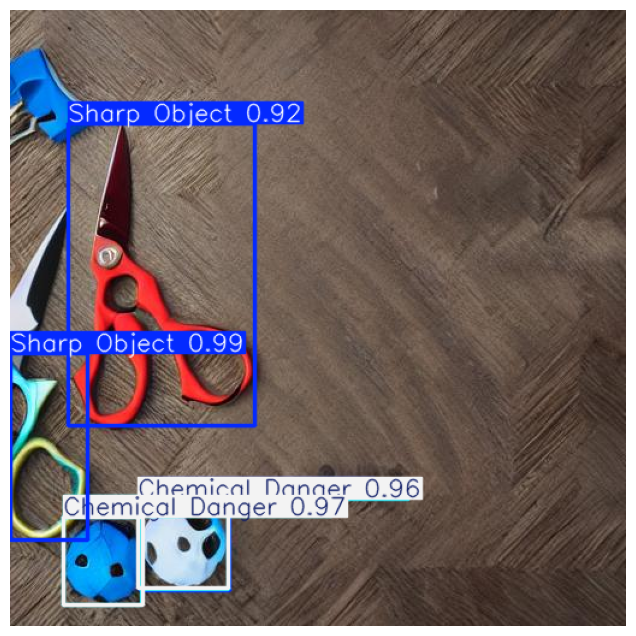

In [13]:
# Block 8: Inference test

import matplotlib.pyplot as plt
import cv2
import os

test_image = os.path.join(RAW_IMAGES_DIR, os.listdir(RAW_IMAGES_DIR)[0])

results = model(test_image, conf=0.3)

# Get the annotated image as a numpy array (BGR format) from the first result
annotated_image_bgr = results[0].plot()

# Convert BGR to RGB for correct display in matplotlib
annotated_image_rgb = cv2.cvtColor(annotated_image_bgr, cv2.COLOR_BGR2RGB)

# Display the image
plt.figure(figsize=(10, 8)) # Optional: Adjust figure size
plt.imshow(annotated_image_rgb)
plt.axis('off') # Hide axes for cleaner display
plt.show()

In [18]:
# Block 8: Evaluate YOLOv8 model

from ultralytics import YOLO

# Загружаем модель, которую мы только что обучили
# The model is saved to /content/child_safety_project_runs/yolov8_child_safety/weights/best.pt
# instead of PROJECT_ROOT because YOLOv8 saves to a local run directory by default.
model_path = "/content/child_safety_project_runs/yolov8_child_safety/weights/best.pt"
model = YOLO(model_path)

# Оценка модели на валидационном наборе
metrics = model.val(
    data=yaml_path,    # path к data.yaml
    batch=8,
    imgsz=640,
)

# Печатаем основные метрики
print("Evaluation metrics:")
print(f"mAP50: {metrics.box.map50:.4f}")
print(f"mAP50-95: {metrics.box.map:.4f}")
print(f"Precision: {metrics.box.p[0].item():.4f}")
print(f"Recall: {metrics.box.r[0].item():.4f}")

Ultralytics 8.3.240 🚀 Python-3.12.12 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,006,428 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access ✅ (ping: 0.6±0.2 ms, read: 32.2±10.8 MB/s, size: 52.9 KB)
val: Scanning /content/drive/MyDrive/ChildSafetyProject1/yolo_dataset/valid/labels.cache... 8 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 8/8 11.1Kit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 2.9it/s 0.3s
                   all          8         37      0.743      0.823      0.844      0.756
          Sharp Object          6          6      0.437          1      0.851      0.785
        Choking Hazard          8         12      0.904       0.79      0.858      0.762
       Chemical Danger          6          9      0.802        0.9      0.955      0.887
     Electrical Hazard          8         10      0.828        0.6      0.711      0.591
Speed: 1.4ms preproce